# Estatísticas sobre Gastos Parlamentares
------------------

# 1. Introdução

---------------

A Cota para o Exercício da Atividade Parlamentar – CEAP (antiga verba indenizatória) é uma cota única mensal destinada a custear os gastos dos deputados exclusivamente vinculados ao exercício da atividade parlamentar.

Aqui implementarei e montarei gráficos sobre os gastos parlamentares, especificamente entre 2009 e 2021, utilizando os dados publicamente disponíveis sobre as despesas do [CEAP](https://dadosabertos.camara.leg.br/swagger/api.html "Arquivos - Despesas pela Cota para Exercício da Atividade Parlamentar").




# Leitura dos dados
---------------

Nas duas células abaixo baixamos os arquivos CSVs de 2009 até 2024 e implementamos uma função para leitura dos dados contidos no arquivo CSV de um ano específico. A função retorna uma lista com os registros dos dados e uma outra lista que corresponde aos rótulos (nome das colunas). Perceba que a lista com os registros dos dados é uma lista multidimensional. Depois, a função implementada <code>le_dados</code> é testada imprimindo os rótulos, a primeira linha dos dados e o número total de registros. Também imprimimos o índice de cada coluna nos registros para facilitar o acesso.

In [14]:
import os
import requests
import zipfile

# Pasta onde os arquivos serão salvos e extraídos
os.makedirs("dados_parlamentares", exist_ok=True)

# Cabeçalho com User-Agent
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 '
                  '(KHTML, like Gecko) Chrome/89.0.4389.82 Safari/537.36'
}

urls = [
    f'http://www.camara.leg.br/cotas/Ano-{ano}.csv.zip'
    for ano in range(2009, 2025)
]

for url in urls:
    nome_arquivo = url.split("/")[-1]
    caminho_arquivo = os.path.join("dados_parlamentares", nome_arquivo)

    print(f"Baixando {nome_arquivo}...")

    try:
        resposta = requests.get(url, headers=headers)
        resposta.raise_for_status()  # Vai levantar erro se a resposta for 4xx ou 5xx

        # Salvar arquivo ZIP
        with open(caminho_arquivo, "wb") as f:
            f.write(resposta.content)

        # Tentar extrair
        with zipfile.ZipFile(caminho_arquivo, 'r') as zip_ref:
            zip_ref.extractall("dados_parlamentares")
            print(f"Extraído com sucesso: {nome_arquivo}")

        os.remove(caminho_arquivo)

    except zipfile.BadZipFile:
        print(f"Erro: {nome_arquivo} não é um arquivo ZIP válido!")
    except requests.RequestException as e:
        print(f"Erro de download em {nome_arquivo}: {e}")

Baixando Ano-2009.csv.zip...
Extraído com sucesso: Ano-2009.csv.zip
Baixando Ano-2010.csv.zip...
Extraído com sucesso: Ano-2010.csv.zip
Baixando Ano-2011.csv.zip...
Extraído com sucesso: Ano-2011.csv.zip
Baixando Ano-2012.csv.zip...
Extraído com sucesso: Ano-2012.csv.zip
Baixando Ano-2013.csv.zip...
Extraído com sucesso: Ano-2013.csv.zip
Baixando Ano-2014.csv.zip...
Extraído com sucesso: Ano-2014.csv.zip
Baixando Ano-2015.csv.zip...
Extraído com sucesso: Ano-2015.csv.zip
Baixando Ano-2016.csv.zip...
Extraído com sucesso: Ano-2016.csv.zip
Baixando Ano-2017.csv.zip...
Extraído com sucesso: Ano-2017.csv.zip
Baixando Ano-2018.csv.zip...
Extraído com sucesso: Ano-2018.csv.zip
Baixando Ano-2019.csv.zip...
Extraído com sucesso: Ano-2019.csv.zip
Baixando Ano-2020.csv.zip...
Extraído com sucesso: Ano-2020.csv.zip
Baixando Ano-2021.csv.zip...
Extraído com sucesso: Ano-2021.csv.zip
Baixando Ano-2022.csv.zip...
Extraído com sucesso: Ano-2022.csv.zip
Baixando Ano-2023.csv.zip...
Extraído com sucess

In [15]:
# Funcao que le os dados de um arquivo CSV e retorna a lista de rótulos (nome das colunas) e os dados.
# Estamos levando em consideracao que todos os dados do arquivo cabem na memória do computador.
def le_dados(filename):
    # Abrindo o arquivo.
    # Utilizamos o parametro 'encoding' para indicar que o arquivo possui uma codificacao especifica.
    # Isso garante que os acentos e caracteres especiais sejam lidos adequadamente.
    #with open(filename, 'r', encoding='ISO-8859-1') as file:
    with open(filename, 'r', encoding='UTF-8') as file:
        # Criando uma lista vazia para armazenar todos os dados do arquivo
        dados = []

        # Para cada linha do arquivo, realizamos as seguintes operacoes:
        # (1) removemos o caractere '\n' do final da linha
        # (2) substituimos as ',' por ';' para evitar problemas com a separacao da parte decimal de valores.
        # (3) removemos as aspas extras
        # (4) transformamos a linha em uma lista
        # (5) adicionamos a lista de itens na lista 'dados'
        for line in file:
            #dados.append(line.rstrip().replace('","','";"').replace('"','').split(';'))
            dados.append(line.rstrip().replace('","','";"').split('";"'))
            dados[-1][0]=dados[-1][0].replace('"','')
            dados[-1][-1]=dados[-1][-1].replace('"','')


    # Separando a primeira linha do arquivo para uma lista separada de 'rotulos'
    rotulos = dados.pop(0)

    return rotulos, dados

############# BLOCO PRINCIPAL DO PROGRAMA #############
# Apenas um teste. Fique a vontade para alterar ou apagar esse trecho de código.
dados09 = []
dados10 = []
dados11 = []
dados12 = []
dados13 = []
dados14 = []
dados15 = []
dados16 = []
dados17 = []
dados18 = []
dados19 = []
dados20 = []
dados21 = []

rotulos, dados09 = le_dados("dados_parlamentares/Ano-2009.csv")
rotulos, dados10 = le_dados("dados_parlamentares/Ano-2010.csv")
rotulos, dados11 = le_dados("dados_parlamentares/Ano-2011.csv")
rotulos, dados12 = le_dados("dados_parlamentares/Ano-2012.csv")
rotulos, dados13 = le_dados("dados_parlamentares/Ano-2013.csv")
rotulos, dados14 = le_dados("dados_parlamentares/Ano-2014.csv")
rotulos, dados15 = le_dados("dados_parlamentares/Ano-2015.csv")
rotulos, dados16 = le_dados("dados_parlamentares/Ano-2016.csv")
rotulos, dados17 = le_dados("dados_parlamentares/Ano-2017.csv")
rotulos, dados18 = le_dados("dados_parlamentares/Ano-2018.csv")
rotulos, dados19 = le_dados("dados_parlamentares/Ano-2019.csv")
rotulos, dados20 = le_dados("dados_parlamentares/Ano-2020.csv")
rotulos, dados21 = le_dados("dados_parlamentares/Ano-2021.csv")
rotulos, dados22 = le_dados("dados_parlamentares/Ano-2022.csv")
rotulos, dados23 = le_dados("dados_parlamentares/Ano-2023.csv")
rotulos, dados24 = le_dados("dados_parlamentares/Ano-2024.csv")


# Para entender o formato dos dados
print(rotulos, "\n")
print("Registro na primeira posição:\n", dados09[0])
print()
print("Nome do parlamentar: ", dados09[0][0])
print("Número total de registros: %d\n" % (len(dados09)))

# Para identificar o índice de cada coluna nos registros
print('Índice - Rótulo')
for i, rotulo in enumerate(rotulos):
    print(f'{i} - {rotulo}')

['\ufefftxNomeParlamentar', 'cpf', 'ideCadastro', 'nuCarteiraParlamentar', 'nuLegislatura', 'sgUF', 'sgPartido', 'codLegislatura', 'numSubCota', 'txtDescricao', 'numEspecificacaoSubCota', 'txtDescricaoEspecificacao', 'txtFornecedor', 'txtCNPJCPF', 'txtNumero', 'indTipoDocumento', 'datEmissao', 'vlrDocumento', 'vlrGlosa', 'vlrLiquido', 'numMes', 'numAno', 'numParcela', 'txtPassageiro', 'txtTrecho', 'numLote', 'numRessarcimento', 'datPagamentoRestituicao', 'vlrRestituicao', 'nuDeputadoId', 'ideDocumento', 'urlDocumento'] 

Registro na primeira posição:
 ['ATHOS AVELINO', '', '', '220', '2007', 'NA', '', '53', '999', 'PASSAGEM AÉREA - RPA', '0', '', 'Cia Aérea - GOL', '075.756.510/0015-9', 'Comp-F8YHJG', '0', '2009-07-25T00:00:00', '-334.42', '0', '-334.42', '7', '2009', '0', 'PEREIRA/ATHOS', 'CANCELAMENTO', '0', '0', '', '', '1543', '0', '']

Nome do parlamentar:  ATHOS AVELINO
Número total de registros: 265197

Índice - Rótulo
0 - ﻿txNomeParlamentar
1 - cpf
2 - ideCadastro
3 - nuCarteir

Como é a evolução dos gastos ao longo dos anos?
---------

Aqui estão as funções para gerar um gráfico que mostra a evolução dos gastos das cotas da Câmara dos Deputados entre **2009 e 2021**.

A informação do gasto está na coluna identificada com o rótulo 'vlrLiquido'.

<ipython-input-23-c6655ae433aa>:16: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(arquivo, sep=';', encoding='utf-8')
<ipython-input-23-c6655ae433aa>:16: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(arquivo, sep=';', encoding='utf-8')
<ipython-input-23-c6655ae433aa>:16: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(arquivo, sep=';', encoding='utf-8')
<ipython-input-23-c6655ae433aa>:16: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(arquivo, sep=';', encoding='utf-8')
<ipython-input-23-c6655ae433aa>:16: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(arquivo, sep=';', encoding='utf-8')
<ipython-input-23-c6655ae433aa>:16: Dtyp

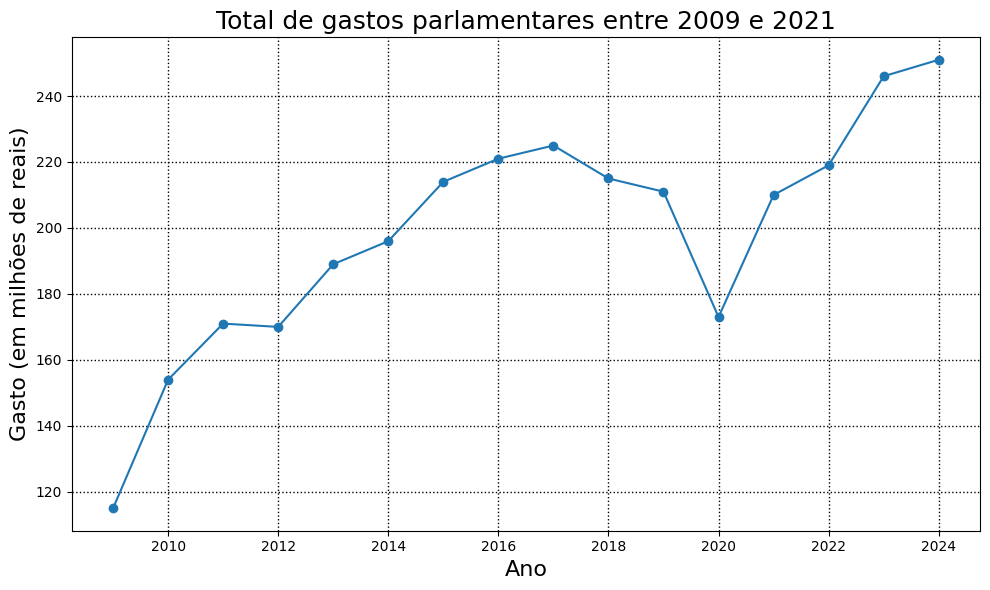

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Caminho para os arquivos CSV já extraídos (ajuste conforme necessário)
caminho_base = 'dados_parlamentares'  # pasta onde estão os arquivos .csv

anos = list(range(2009, 2025))
x = np.array(anos)
y = []

def gasto_ano(ano):
    arquivo = os.path.join(caminho_base, f"Ano-{ano}.csv")
    try:
        df = pd.read_csv(arquivo, sep=';', encoding='utf-8')
        total = df['vlrLiquido'].sum()
        return total // 1_000_000  # milhões de reais
    except Exception as e:
        print(f"Erro ao processar {ano}: {e}")
        return 0

# Preencher y com os gastos de cada ano
for ano in anos:
    y.append(round(gasto_ano(ano)))

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o')
plt.title("Total de gastos parlamentares entre 2009 e 2021", fontsize=18)
plt.xlabel("Ano", fontsize=16)
plt.ylabel("Gasto (em milhões de reais)", fontsize=16)
plt.grid(color='k', linestyle='dotted', linewidth=1)
plt.style.use('ggplot')
plt.tight_layout()
plt.show()

Quais os deputados que mais gastaram?
---------

Aqui mostramos os **20 parlamentares** que mais gastaram em **2024**.

<ipython-input-25-fcd7594fed10>:2: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2024 = pd.read_csv('dados_parlamentares/Ano-2024.csv', sep=';', encoding='utf-8')


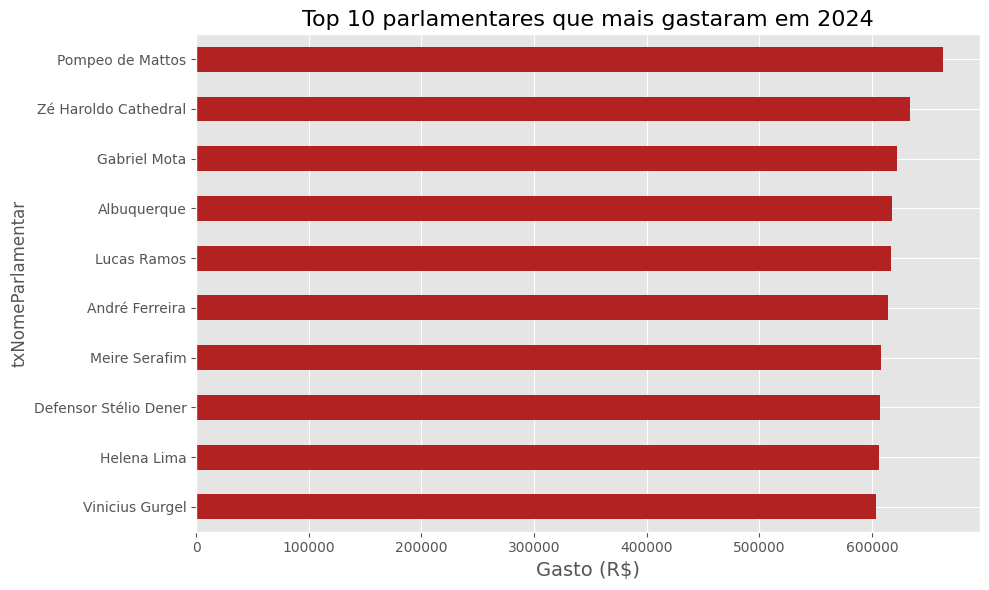

In [25]:
# Carrega o CSV de 2024
df_2024 = pd.read_csv('dados_parlamentares/Ano-2024.csv', sep=';', encoding='utf-8')

# Remove possíveis colunas com nomes estranhos por causa de caracteres ocultos
df_2024.columns = df_2024.columns.str.strip()

# Agrupa por nome do parlamentar e soma os gastos líquidos
gastos_por_parlamentar = df_2024.groupby('txNomeParlamentar')['vlrLiquido'].sum()

# Ordena do maior para o menor
gastos_ordenados = gastos_por_parlamentar.sort_values(ascending=False)

top_10 = gastos_ordenados.head(10)

plt.figure(figsize=(10,6))
top_10.plot(kind='barh', color='firebrick')
plt.title('Top 10 parlamentares que mais gastaram em 2024', fontsize=16)
plt.xlabel('Gasto (R$)', fontsize=14)
plt.gca().invert_yaxis()  # Coloca o maior no topo
plt.tight_layout()
plt.show()


Quais os partidos que mais gastam na média?
---------

Aqui é mostrado o ***gasto médio*** de cada partido no ano de **2024**.

O gasto médio do partido X é a soma dos gastos de todos os deputados filiados ao partido "X" dividido pela quantidade de deputados filiados ao partido X.

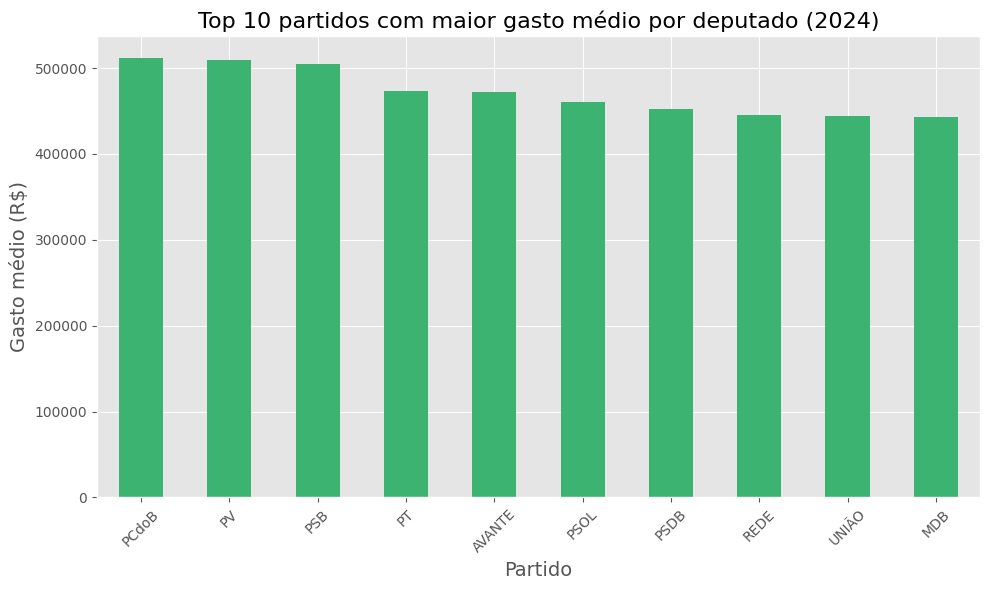

In [37]:
# Agrupa os dados por parlamentar e partido, somando os gastos de cada deputado
gastos_deputados = df_2024.groupby(['txNomeParlamentar', 'sgPartido'])['vlrLiquido'].sum().reset_index()

# Agora, agrupa por partido: soma total dos gastos e conta de deputados únicos
gastos_por_partido = gastos_deputados.groupby('sgPartido').agg({
    'vlrLiquido': 'sum',
    'txNomeParlamentar': 'count'  # conta deputados distintos
}).rename(columns={
    'vlrLiquido': 'gasto_total',
    'txNomeParlamentar': 'num_deputados'
})

# Calcula o gasto médio por deputado em cada partido
gastos_por_partido['gasto_medio'] = gastos_por_partido['gasto_total'] / gastos_por_partido['num_deputados']
gasto_medio = gastos_por_partido['gasto_medio']
gasto_medio = gasto_medio.sort_values()

# Ordena do maior para o menor
gastos_por_partido = gastos_por_partido.sort_values(by='gasto_medio', ascending=False)

top10_partidos = gastos_por_partido['gasto_medio'].head(10)

plt.figure(figsize=(10,6))
top10_partidos.plot(kind='bar', color='mediumseagreen')
plt.title('Top 10 partidos com maior gasto médio por deputado (2024)', fontsize=16)
plt.ylabel('Gasto médio (R$)', fontsize=14)
plt.xlabel('Partido', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



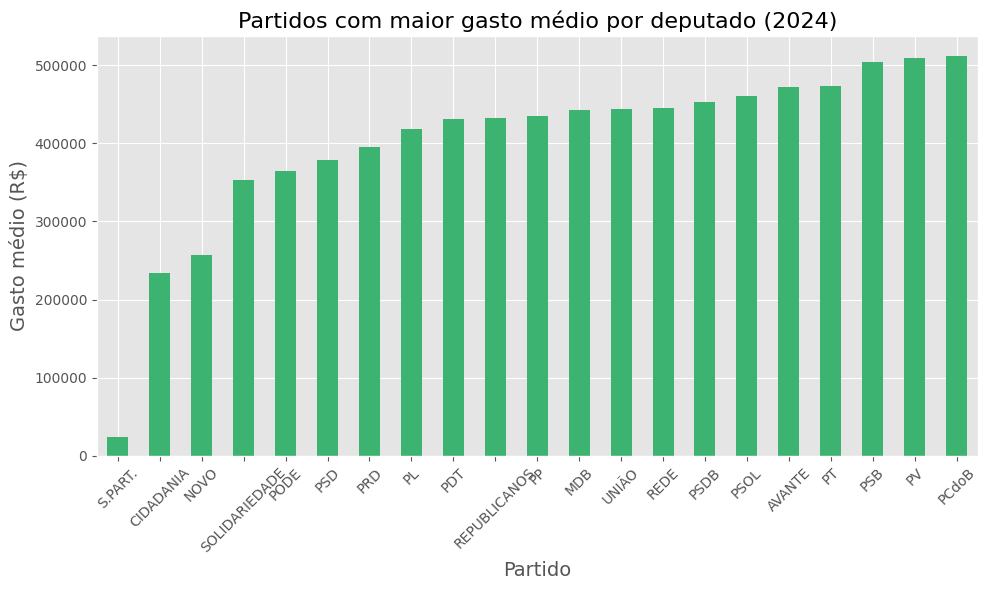

In [38]:


plt.figure(figsize=(10,6))
gasto_medio.plot(kind='bar', color='mediumseagreen')
plt.title('Gasto médio dos partidos por deputado (2024)', fontsize=16)
plt.ylabel('Gasto médio (R$)', fontsize=14)
plt.xlabel('Partido', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Quais os estados com os maiores gastos na média?
---------

Aqui está o ***gasto médio*** de cada estado no ano de **2021**.

In [28]:
# Agrupa por deputado e estado (UF), somando o gasto total de cada deputado
gastos_deputados_uf = df_2024.groupby(['txNomeParlamentar', 'sgUF'])['vlrLiquido'].sum().reset_index()

# Agora agrupa por estado, somando os gastos totais e contando os deputados
gastos_por_estado = gastos_deputados_uf.groupby('sgUF').agg({
    'vlrLiquido': 'sum',
    'txNomeParlamentar': 'count'
}).rename(columns={
    'vlrLiquido': 'gasto_total',
    'txNomeParlamentar': 'num_deputados'
})

# Cálculo do gasto médio por deputado no estado
gastos_por_estado['gasto_medio'] = gastos_por_estado['gasto_total'] / gastos_por_estado['num_deputados']

# Ordena do maior para o menor
gastos_por_estado = gastos_por_estado.sort_values(by='gasto_medio', ascending=False)


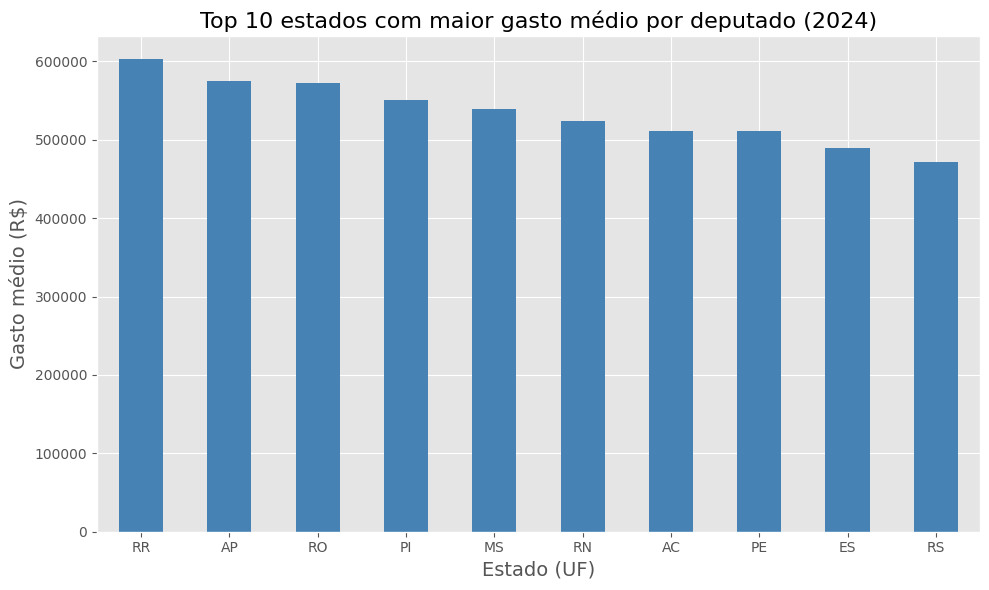

In [29]:
top_estados = gastos_por_estado['gasto_medio'].head(10)

plt.figure(figsize=(10,6))
top_estados.plot(kind='bar', color='steelblue')
plt.title('Top 10 estados com maior gasto médio por deputado (2024)', fontsize=16)
plt.ylabel('Gasto médio (R$)', fontsize=14)
plt.xlabel('Estado (UF)', fontsize=14)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Análise Temporal e Sazonalidade dos Gastos
---------

Aqui, agrupamos os gastos por mês para visualizar a evolução dos gastos ao longo de 2024.

<ipython-input-40-8daa34b2e284>:2: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('dados_parlamentares/Ano-2024.csv', sep=';', encoding='utf-8')


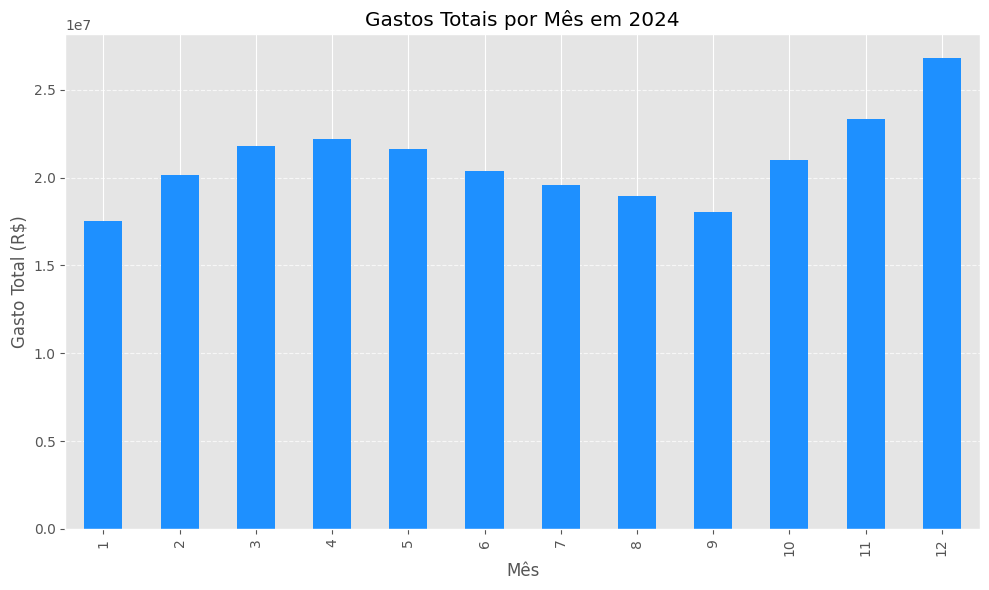

In [40]:
# Carrega os dados de 2024
df = pd.read_csv('dados_parlamentares/Ano-2024.csv', sep=';', encoding='utf-8')
df.columns = df.columns.str.strip()  # remove espaços extras nos nomes das colunas

# Converte a coluna de valores para numérico (caso haja problemas)
df['vlrLiquido'] = pd.to_numeric(df['vlrLiquido'], errors='coerce')

# Agrupa os dados por mês (coluna 'numMes') e soma os gastos
gastos_por_mes = df.groupby('numMes')['vlrLiquido'].sum()

# Plot do gasto total por mês
plt.figure(figsize=(10,6))
gastos_por_mes.sort_index().plot(kind='bar', color='dodgerblue')
plt.xlabel('Mês')
plt.ylabel('Gasto Total (R$)')
plt.title('Gastos Totais por Mês em 2024')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Análise por Categoria de Despesa
---------

Utilizando a coluna txtDescricao, identificamos quais categorias apresentam maiores gastos.
Também é possível comparar, por exemplo, valores brutos (coluna vlrDocumento) com os valores glosados (vlrGlosa), mas neste exemplo vamos focar no gasto líquido.

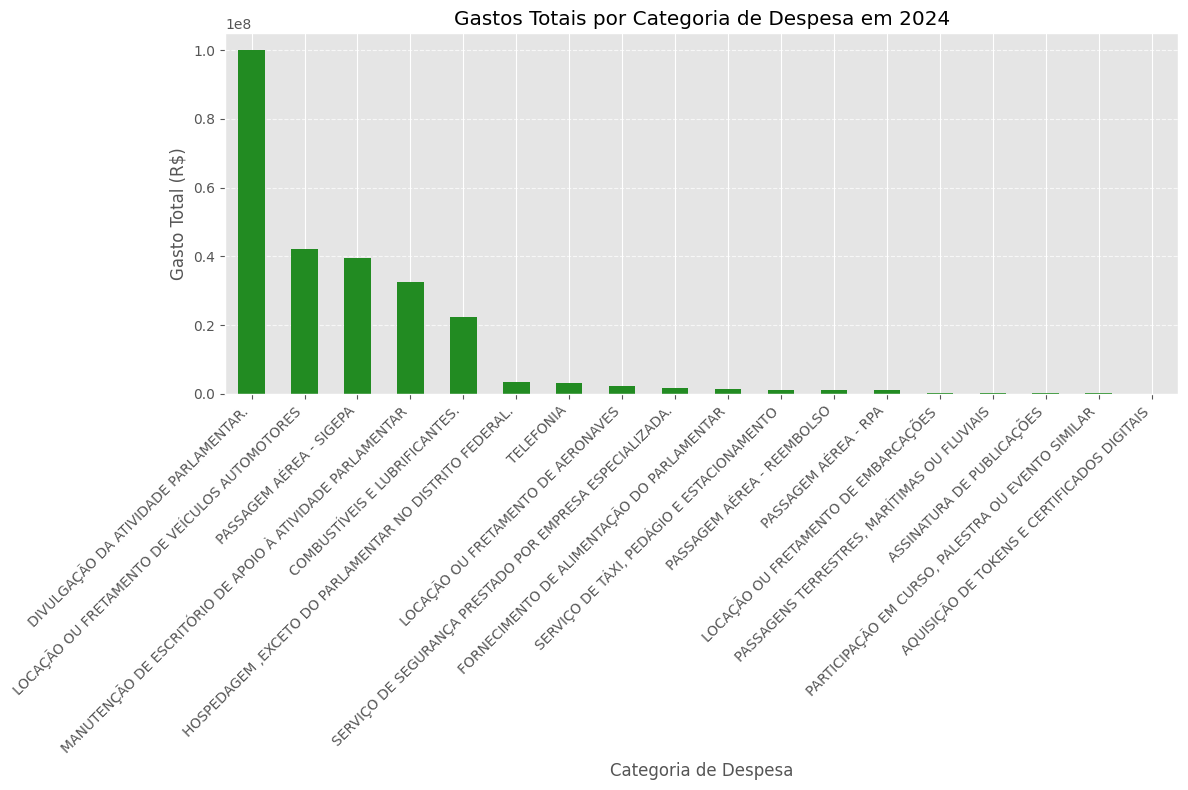

In [41]:
# Agrupa os dados por categoria de despesa e soma os gastos líquidos
gastos_por_categoria = df.groupby('txtDescricao')['vlrLiquido'].sum().sort_values(ascending=False)

# Plot dos gastos por categoria (podem ser muitas categorias, ajuste o tamanho se necessário)
plt.figure(figsize=(12,8))
gastos_por_categoria.plot(kind='bar', color='forestgreen')
plt.xlabel('Categoria de Despesa')
plt.ylabel('Gasto Total (R$)')
plt.title('Gastos Totais por Categoria de Despesa em 2024')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Análise Comparativa por Partidos e Estados
---------

A ideia é comparar o gasto médio dos deputados (por partido ou por estado) bem como o gasto total acumulado.
Para isso, primeiro agregamos os dados dos deputados (soma dos gastos por parlamentar) e, depois, agrupamos por grupo (partido ou estado).

Gasto total e gasto médio por partido (2024):
               gasto_total    gasto_medio
sgPartido                                
PCdoB           3583496.18  511928.025714
PV              2546773.96  509354.792000
PSB             7565543.87  504369.591333
PT             34038019.46  472750.270278
AVANTE          3774401.08  471800.135000
PSOL            5991144.23  460857.248462
PSDB            5886620.77  452816.982308
REDE             444964.06  444964.060000
UNIÃO          29735641.07  443815.538358
MDB            21270598.16  443137.461667
PP             24358567.85  434974.425893
REPUBLICANOS   22932443.02  432687.604151
PDT             9057079.09  431289.480476
PL             43546109.50  418712.591346
PRD             2371960.39  395326.731667
PSD            21979559.10  378957.915517
PODE            6568801.79  364933.432778
SOLIDARIEDADE   2468297.12  352613.874286
NOVO            1030206.85  257551.712500
CIDADANIA       1170774.73  234154.946000
S.PART.           24423.63   2

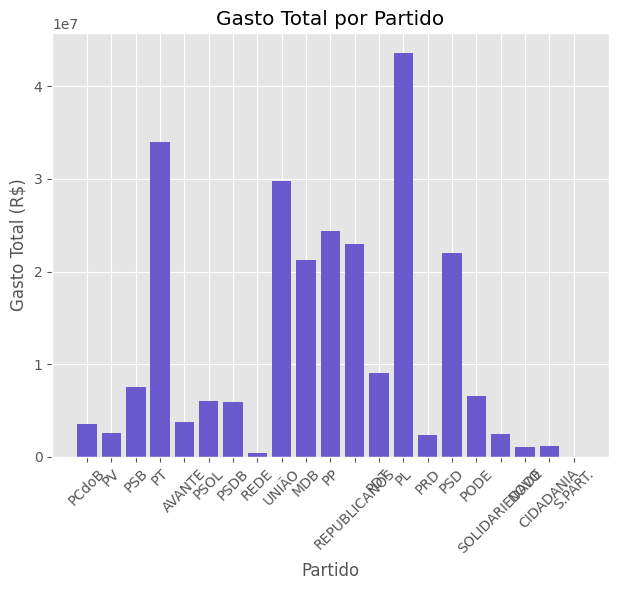

In [44]:
# POR PARTIDOS:

# Agrega o gasto total de cada deputado (agrupando por nome) e pega o partido correspondente
gastos_deputados_partido = df.groupby('txNomeParlamentar').agg({
    'vlrLiquido': 'sum',
    'sgPartido': 'first'
}).reset_index()

# Agrupa por partido para calcular o gasto total e o número de deputados
agrupamento_partido = gastos_deputados_partido.groupby('sgPartido').agg({
    'vlrLiquido': ['sum', 'mean']
})
agrupamento_partido.columns = ['gasto_total', 'gasto_medio']
agrupamento_partido = agrupamento_partido.sort_values(by='gasto_medio', ascending=False)

# Exibe os dados
print("Gasto total e gasto médio por partido (2024):")
print(agrupamento_partido)

# Plot – dois gráficos separados (pode-se optar por ambos ou escolher um)
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.bar(agrupamento_partido.index, agrupamento_partido['gasto_total'], color='slateblue')
plt.xticks(rotation=45)
plt.xlabel('Partido')
plt.ylabel('Gasto Total (R$)')
plt.title('Gasto Total por Partido')

plt.tight_layout()
plt.show()

Gasto total e gasto médio por Estado (2024):
      gasto_total    gasto_medio
sgUF                            
RR     4819697.14  602462.142500
AP     4595778.25  574472.281250
RO     4576034.57  572004.321250
PI     5501660.15  550166.015000
MS     4313299.31  539162.413750
RN     4192380.53  524047.566250
AC     4601199.31  511244.367778
PE    13279840.80  510763.107692
ES     4890960.57  489096.057000
RS    15550657.99  471232.060303
BA    19557728.89  465660.211667
AL     4140329.07  460036.563333
PA     8171025.15  453945.841667
CE    11682559.89  449329.226538
MG    25256902.92  435463.843448
GO     7602228.76  422346.042222
PB     6310961.69  420730.779333
PR    14895888.45  413774.679167
TO     4131711.35  413171.135000
SP    30248066.87  387795.729103
RJ    20400187.86  384909.204906
DF     3455569.65  383952.183333
AM     3822109.82  382210.982000
SC     7099003.15  354950.157500
MT     3737310.43  339755.493636
SE     4049450.04  337454.170000
MA     9462883.30  326306.32069

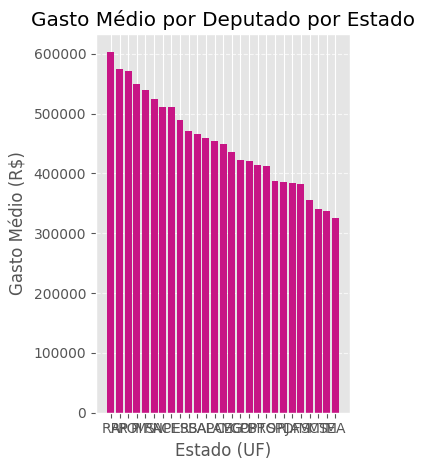

In [45]:
# POR ESTADO (UF):

# Agrega o gasto total de cada deputado e obtém a UF associada
gastos_deputados_estado = df.groupby('txNomeParlamentar').agg({
    'vlrLiquido': 'sum',
    'sgUF': 'first'
}).reset_index()

# Agrupa por Estado para calcular o gasto total e gasto médio
agrupamento_estado = gastos_deputados_estado.groupby('sgUF').agg({
    'vlrLiquido': ['sum', 'mean']
})
agrupamento_estado.columns = ['gasto_total', 'gasto_medio']
agrupamento_estado = agrupamento_estado.sort_values(by='gasto_medio', ascending=False)

# Exibe os dados
print("Gasto total e gasto médio por Estado (2024):")
print(agrupamento_estado)

plt.subplot(1, 2, 2)
plt.bar(agrupamento_estado.index, agrupamento_estado['gasto_medio'], color='mediumvioletred')
plt.xlabel('Estado (UF)')
plt.ylabel('Gasto Médio (R$)')
plt.title('Gasto Médio por Deputado por Estado')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Análise de Outliers e Anomalias
-------

Para identificar registros com gastos atípicos, podemos utilizar boxplots e também calcular os limites dos outliers usando o método do IQR (Intervalo Interquartílico).

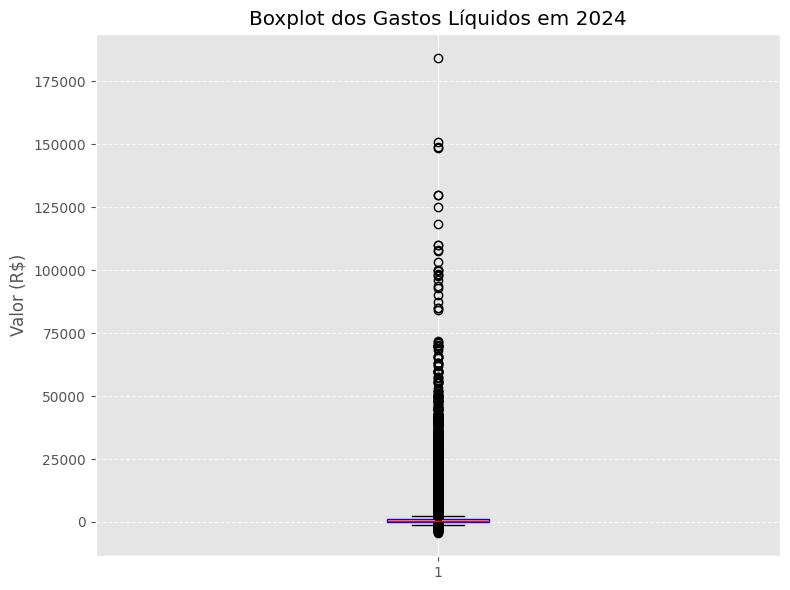

In [46]:
plt.figure(figsize=(8,6))
plt.boxplot(df['vlrLiquido'].dropna(), vert=True, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='blue'),
            medianprops=dict(color='red'))
plt.title('Boxplot dos Gastos Líquidos em 2024')
plt.ylabel('Valor (R$)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [47]:
# Calcula os quartis
Q1 = df['vlrLiquido'].quantile(0.25)
Q3 = df['vlrLiquido'].quantile(0.75)
IQR = Q3 - Q1

# Define limites para outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtra os registros que são considerados outliers
outliers = df[(df['vlrLiquido'] < limite_inferior) | (df['vlrLiquido'] > limite_superior)]

print("Registros considerados outliers (gastos atípicos):")
print(outliers[['txNomeParlamentar', 'vlrLiquido', 'txtDescricao']].sort_values(by='vlrLiquido', ascending=False))

Registros considerados outliers (gastos atípicos):
         txNomeParlamentar  vlrLiquido                          txtDescricao
154527          Duda Ramos   184428.00  DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.
107112   Professor Alcides   150960.00  DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.
188850  Sargento Gonçalves   149000.00  DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.
205240     Guilherme Uchoa   148500.00  DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.
18855         Silas Câmara   130000.00  DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.
...                    ...         ...                                   ...
11043         José Priante    -3782.39               PASSAGEM AÉREA - SIGEPA
10634     Elcione Barbalho    -3782.50               PASSAGEM AÉREA - SIGEPA
142715          Pastor Gil    -3783.39               PASSAGEM AÉREA - SIGEPA
127167          Dr. Jaziel    -3912.52               PASSAGEM AÉREA - SIGEPA
91069         Alex Manente    -4193.99               PASSAGEM AÉREA - SIGEPA

[28095 rows x 3 columns]